<a href="https://colab.research.google.com/github/ijinshes2ly/subscription_analysis_retention_report/blob/main/subscription_KPI_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
!pip install koreanize-matplotlib
import koreanize_matplotlib

df=pd.read_csv('subscription_data.csv')
df.isnull().sum()

df["월평균이용시간(시간)"]=df["월평균이용시간(시간)"].fillna(df["월평균이용시간(시간)"].mean())

df["결제금액"]=df["결제금액"].fillna(df["결제금액"].median())

df.isnull().sum()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 44.6 MB/s eta 0:00:00


,0
고객ID,0
가입일,0
구독기간(개월),0
구독상태,0
서비스이용횟수,0
월평균이용시간(시간),0
결제금액,0
할인사용여부,0
추천가입여부,0
고객유형,0


In [ ]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   고객ID         2000 non-null   int64  
 1   가입일          2000 non-null   object 
 2   구독기간(개월)     2000 non-null   int64  
 3   구독상태         2000 non-null   int64  
 4   서비스이용횟수      2000 non-null   int64  
 5   월평균이용시간(시간)  2000 non-null   float64
 6   결제금액         2000 non-null   float64
 7   할인사용여부       2000 non-null   int64  
 8   추천가입여부       2000 non-null   int64  
 9   고객유형         2000 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 156.4+ KB


In [ ]:
df.groupby("구독상태").agg({"서비스이용횟수" :"mean", "월평균이용시간(시간)" : "mean"})


,서비스이용횟수,월평균이용시간(시간)
구독상태,,
0,25.184943,20.305087
1,24.820014,20.046414


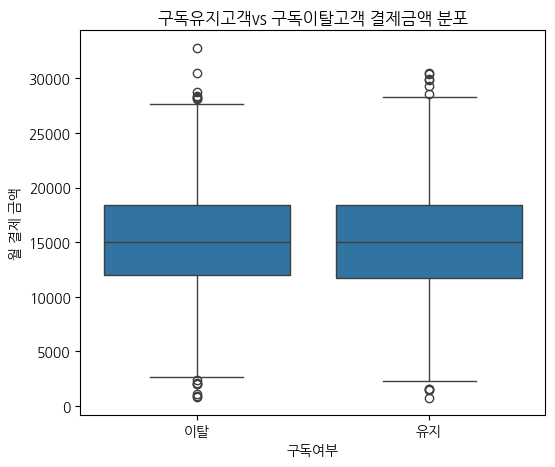


T-검정 통계량: -0.9235357544707836, P-값: 0.35583959185176905


In [4]:
#구독유지고객vs 구독이탈고객 결제금액 분포
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.figure(figsize=(6, 5))
sns.boxplot(x=df["구독상태"], y=df["결제금액"])
plt.xticks([0, 1], ["이탈", "유지"])
plt.title("구독유지고객vs 구독이탈고객 결제금액 분포")
plt.xlabel("구독여부")
plt.ylabel("월 결제 금액")
plt.show()
t_stat, p_value = stats.ttest_ind(df[df["구독상태"] == 1]["결제금액"],
                                  df[df["구독상태"] == 0]["결제금액"],
                                  nan_policy='omit')

print(f"\nT-검정 통계량: {t_stat}, P-값: {p_value}")

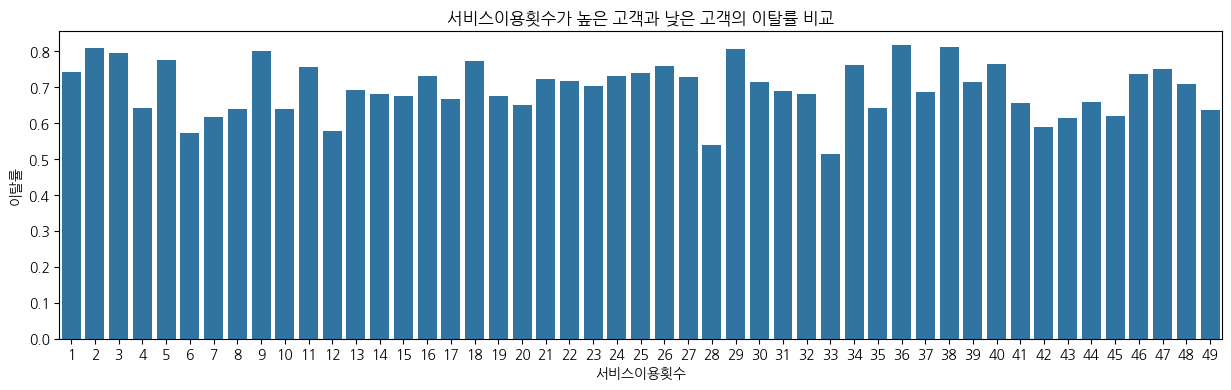

In [ ]:
#서비스이용횟수가 높은 고객과 낮은 고객의 이탈률 비교
grouped = df.groupby("서비스이용횟수")["구독상태"].mean().sort_values()
plt.figure(figsize=(15, 4))
sns.barplot(x=grouped.index, y=grouped.values)
plt.title("서비스이용횟수가 높은 고객과 낮은 고객의 이탈률 비교")
plt.xlabel("서비스이용횟수")
plt.ylabel("이탈률")
plt.show()

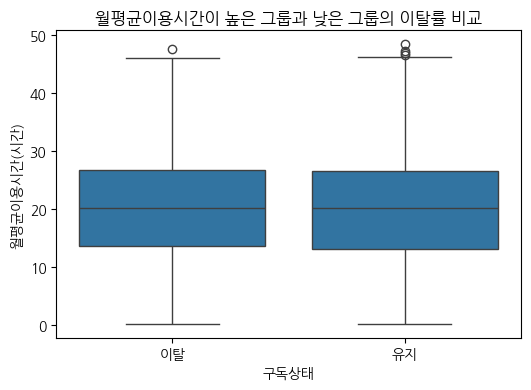

In [ ]:
#월평균이용시간이 높은 그룹과 낮은 그룹의 이탈률 비교
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["구독상태"], y=df["월평균이용시간(시간)"])
plt.xticks([0, 1], ["이탈", "유지"])
plt.title("월평균이용시간이 높은 그룹과 낮은 그룹의 이탈률 비교")
plt.show()

In [12]:
#월평균이용시간이 낮은 그룹과 높은 그룹의 이탈률 비교
print(df.groupby("구독상태")["월평균이용시간(시간)"].nlargest(5).groupby("구독상태").mean()[0])
print(df.groupby("구독상태")["월평균이용시간(시간)"].nlargest(5).groupby("구독상태").mean()[1])
print(df.groupby("구독상태")["월평균이용시간(시간)"].nsmallest(5).groupby("구독상태").mean()[1])
print(df.groupby("구독상태")["월평균이용시간(시간)"].nsmallest(5).groupby("구독상태").mean()[0])

45.94576539589256
47.098137818920215
0.09812564288240604
0.6404655376878772


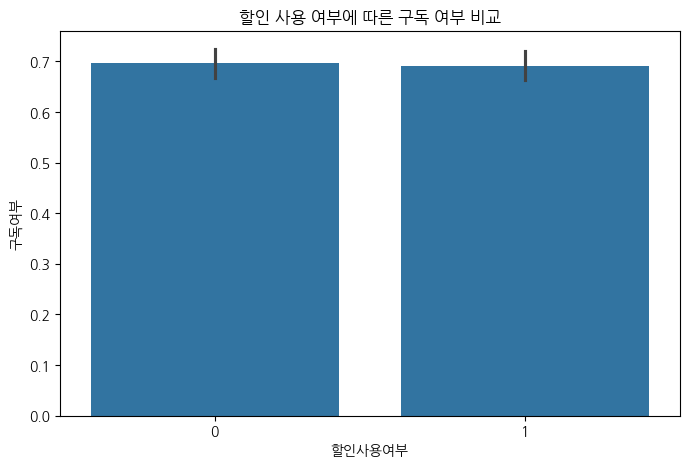

In [13]:
#할인 사용 여부에 따른 구독 여부 비교
plt.figure(figsize=(8, 5))
sns.barplot(x=df["할인사용여부"], y=df["구독상태"])
plt.title("할인 사용 여부에 따른 구독 여부 비교")
plt.xlabel("할인사용여부")
plt.ylabel("구독여부")
plt.show()

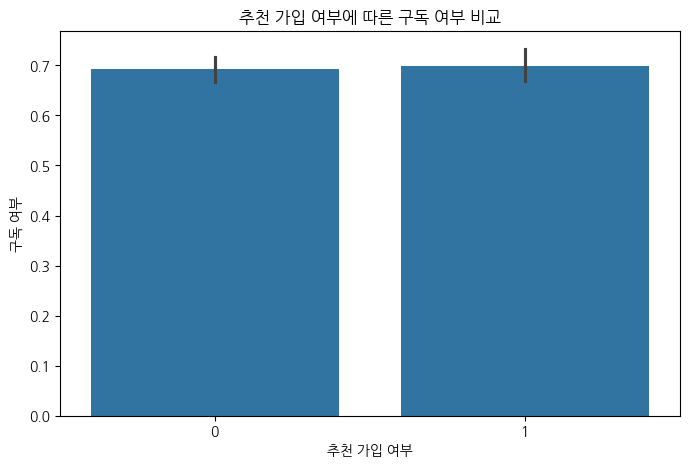

In [14]:
#추천 가입 여부에 따른 구독 여부 비교
plt.figure(figsize=(8, 5))
sns.barplot(x=df["추천가입여부"], y=df["구독상태"])
plt.title("추천 가입 여부에 따른 구독 여부 비교")
plt.xlabel("추천 가입 여부")
plt.ylabel("구독 여부")
plt.show()

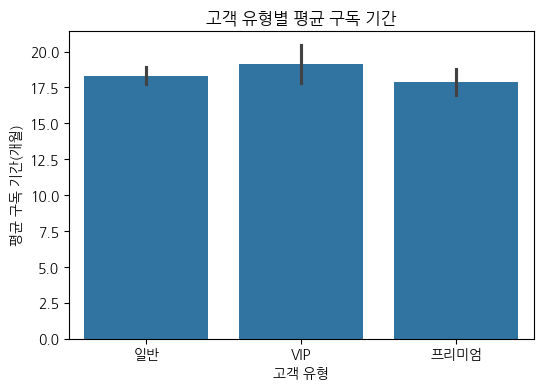

In [ ]:
#고객 유형별 평균 구독 기간
plt.figure(figsize=(6, 4))
sns.barplot(x=df["고객유형"], y=df["구독기간(개월)"], estimator=np.mean)
plt.title("고객 유형별 평균 구독 기간")
plt.xlabel("고객 유형")
plt.ylabel("평균 구독 기간(개월)")
plt.show()

In [ ]:
df.groupby("고객유형")["구독기간(개월)"].mean()

,구독기간(개월)
고객유형,
VIP,19.148148
일반,18.315486
프리미엄,17.884211


고객유형
VIP     15376.215024
일반      15067.968981
프리미엄    14952.710658
Name: 결제금액, dtype: float64


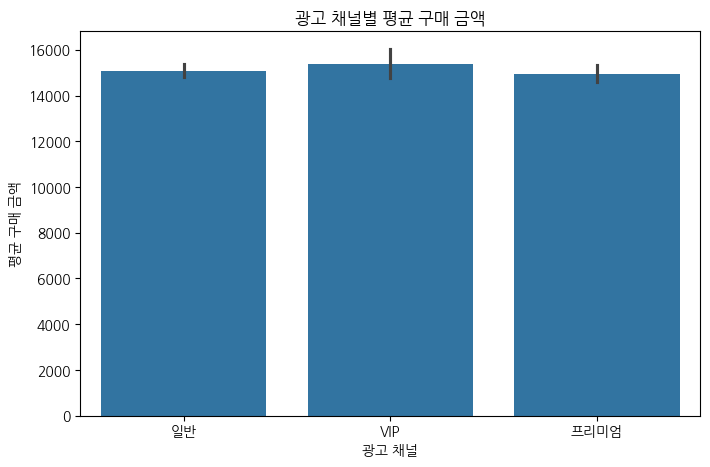

In [ ]:
#광고 채널별 평균 구매 금액
print(df.groupby("고객유형")["결제금액"].mean())
plt.figure(figsize=(8, 5))
sns.barplot(x=df["고객유형"], y=df["결제금액"], estimator=np.mean)
plt.title("광고 채널별 평균 구매 금액")
plt.xlabel("광고 채널")
plt.ylabel("평균 구매 금액")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df["결제금액_정규화"] = scaler.fit_transform(df[["결제금액"]])
scaler = StandardScaler()
df["결제금액_표준화"] = scaler.fit_transform(df[["결제금액"]])
display(df[["결제금액", "결제금액_정규화", "결제금액_표준화"]].describe())

,결제금액,결제금액_정규화,결제금액_표준화
count,2000.000000,2000.000000,2.000000e+03
mean,15068.410932,0.447223,-1.691980e-16
std,5002.716760,0.156151,1.000250e+00
min,740.460796,0.000000,-2.864750e+00
25%,11782.096585,0.344646,-6.570702e-01
50%,14998.426031,0.445038,-1.399288e-02
75%,18405.765379,0.551392,6.672753e-01
max,32778.085648,1.000000,3.540897e+00
